Installing and loading libraries to use


In [1]:
#pip uninstall scikit-learn xgboost -y

In [2]:
!pip install scikit-learn==1.5.2
!pip install xgboost

In [3]:
# import sklearn
# import xgboost

# print("scikit-learn version:", sklearn.__version__)
# print("xgboost version:", xgboost.__version__)

## Description of variables in Train/Test.csv

0. **ID**: A unique identifier for each entry in the dataset.

1. **customer_id**: Unique identifier for each customer in the dataset.

2. **country_id**: Identifier or code representing the country where the customer resides or where the loan was issued.

3. **tbl_loan_id**: Unique identifier for each loan associated with the customer.

4. **Total_Amount**: The total loan amount initially disbursed to the customer.

5. **Total_Amount_to_Repay**: The total amount the customer is expected to repay, including principal, interest, and fees.

6. **loan_type**: The category or type of loan.

7. **disbursement_date**: The date when the loan amount was disbursed to the customer.

8. **duration**: The length of the loan term, typically expressed in days

9. **lender_id**: Unique identifier for the lender or institution that issued the loan.

10. **New_versus_Repeat**: Indicates whether the loan is the customer's first loan ("New") or if the customer has taken loans before ("Repeat").

11. **Amount_Funded_By_Lender**: The portion of the loan funded directly by the lender.

12. **Lender_portion_Funded**: Percentage of the total loan amount funded by the lender.

13. **due_date**: The date by which the loan repayment is due.

14. **Lender_portion_to_be_repaid**: The portion of the outstanding loan that needs to be repaid to the lender.

15. **target**: This variables takes the value 0 or 1. 1 means the customer defaulted on the loan, whereas 0 means, the customer paid the loan.


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split, KFold,  GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score , confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
#3from sklearn.compose import ColumnTransformer

In [6]:
#load train dataset
train_df=pd.read_csv('/content/drive/MyDrive/african-credit-scoring-challenge20241203-14702-1yayxml (1)/Train.csv')

In [7]:
#display train dataset
train_df

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,244559,Kenya,228408,267278,Type_1,1460.0,1515.0,2022-07-30,2022-08-06,7,Repeat Loan,438.00,0.300000,455.0,0
68650,ID_260062217784267278,260062,Kenya,217784,267278,Type_1,5029.0,5116.0,2022-07-16,2022-07-23,7,Repeat Loan,1508.70,0.300000,1535.0,0
68651,ID_259137216701267278,259137,Kenya,216701,267278,Type_1,5289.0,5289.0,2022-07-15,2022-07-22,7,Repeat Loan,1586.70,0.300000,1587.0,0
68652,ID_266801303201267278,266801,Kenya,303201,267278,Type_1,3334.0,3334.0,2022-11-23,2022-11-30,7,Repeat Loan,741.09,0.222283,741.0,0


In [8]:
#load and display test dataset
test_df=pd.read_csv('/content/drive/MyDrive/african-credit-scoring-challenge20241203-14702-1yayxml (1)/Test.csv')
test_df

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.00,1989.00,2022-07-27,2022-08-03,7,Repeat Loan,575.70,0.300000,597.00
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.00,2153.00,2022-11-16,2022-11-23,7,Repeat Loan,0.00,0.000000,0.00
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.00,8304.00,2022-08-24,2022-08-31,7,Repeat Loan,207.00,0.025079,208.00
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.00,3379.00,2022-11-15,2022-11-22,7,Repeat Loan,1013.70,0.300000,1014.00
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.00,120.00,2022-11-10,2022-11-17,7,Repeat Loan,36.00,0.300000,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,ID_297596365331297183,297596,Ghana,365331,297183,Type_3,1730.41,1782.32,2023-02-09,2023-02-16,7,Repeat Loan,269.41,0.155689,279.77
18590,ID_259715231897267278,259715,Kenya,231897,267278,Type_1,1534.00,1534.00,2022-08-04,2022-08-11,7,Repeat Loan,460.20,0.300000,460.00
18591,ID_296701364008297183,296701,Ghana,364008,297183,Type_3,1372.21,1413.30,2022-06-23,2022-06-30,7,Repeat Loan,178.67,0.130208,178.67
18592,ID_268271242864267278,268271,Kenya,242864,267278,Type_1,5608.00,5781.00,2022-08-23,2022-08-30,7,Repeat Loan,0.00,0.000000,0.00


In [9]:
#check duplicate entries
train_df.duplicated().sum()

0

In [10]:
#display train data information
train_information={'Datatype':train_df.dtypes,
                   'present_entries':train_df.notnull().sum(),
                   'missing_entries':train_df.isnull().sum(),
                   'unique_ebtries':train_df.nunique()}

df_details = pd.DataFrame(train_information)
df_details

,Datatype,present_entries,missing_entries,unique_ebtries
ID,object,68654,0,68654
customer_id,int64,68654,0,6540
country_id,object,68654,0,1
tbl_loan_id,int64,68654,0,66520
lender_id,int64,68654,0,4
loan_type,object,68654,0,22
Total_Amount,float64,68654,0,19076
Total_Amount_to_Repay,float64,68654,0,21920
disbursement_date,object,68654,0,768
due_date,object,68654,0,893


In [11]:
#train data statistical data summary
train_df.describe()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


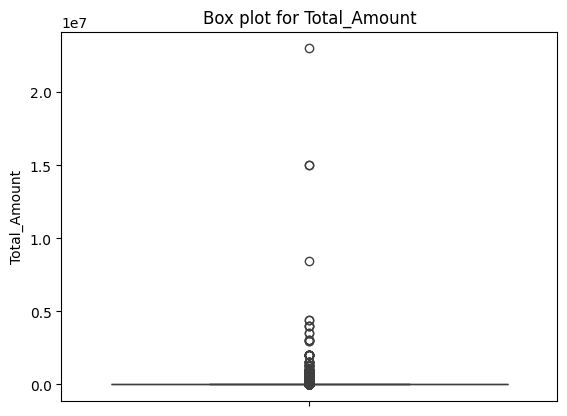

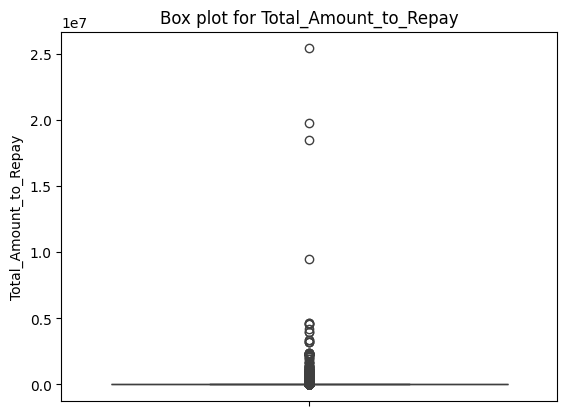

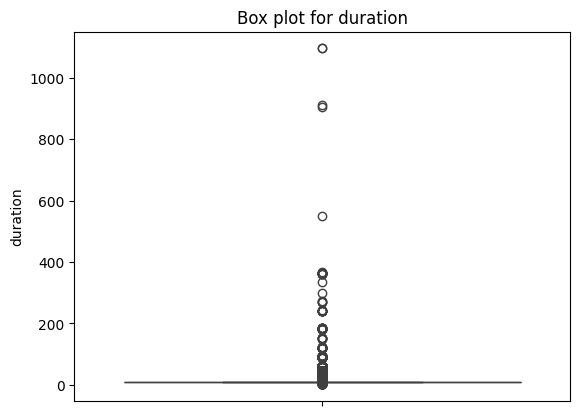

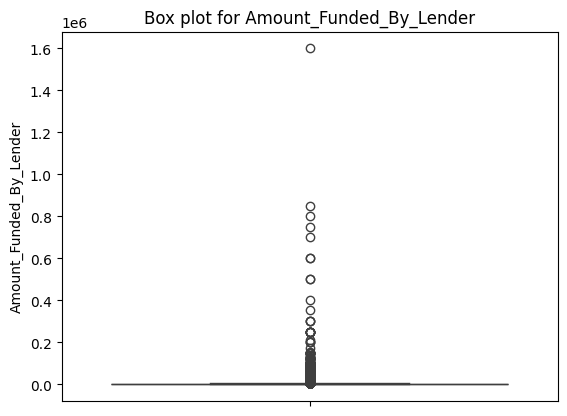

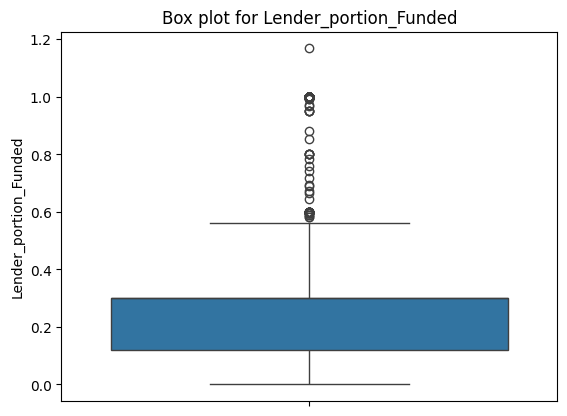

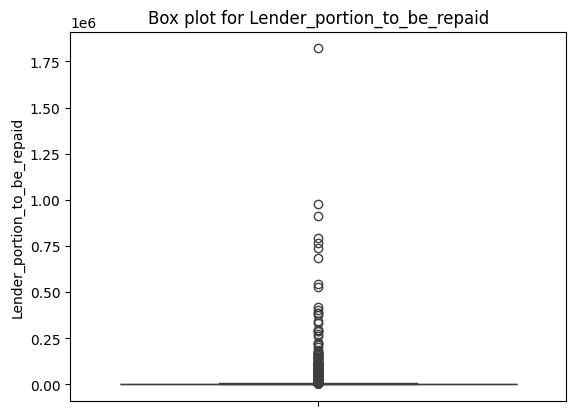

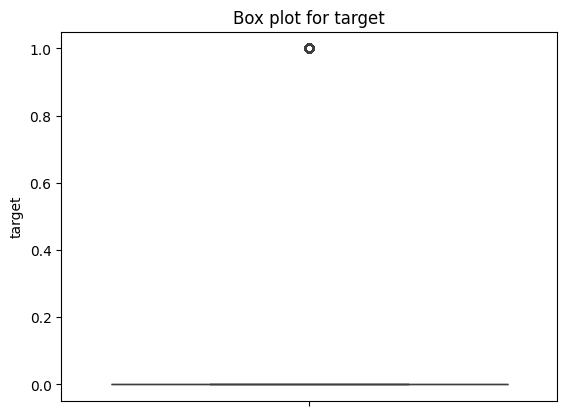

In [12]:
# Box plots for numerical features
numerical_features = train_df[['Total_Amount','Total_Amount_to_Repay','duration','Amount_Funded_By_Lender','Lender_portion_Funded','Lender_portion_to_be_repaid','target']]
for feature in numerical_features:
    sns.boxplot(data=train_df[feature])
    plt.title(f"Box plot for {feature}")
    plt.show()

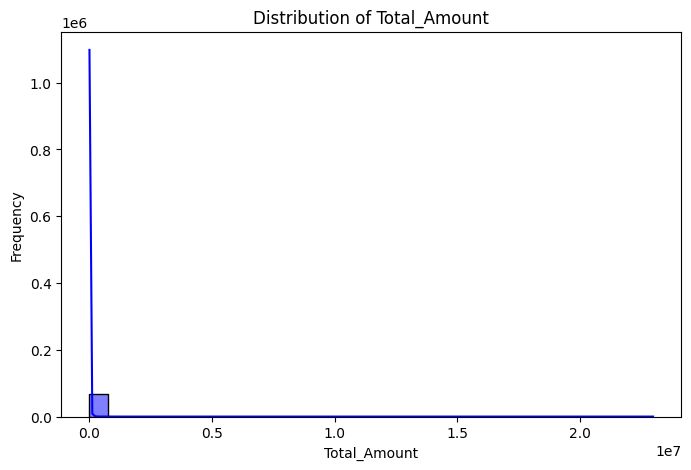

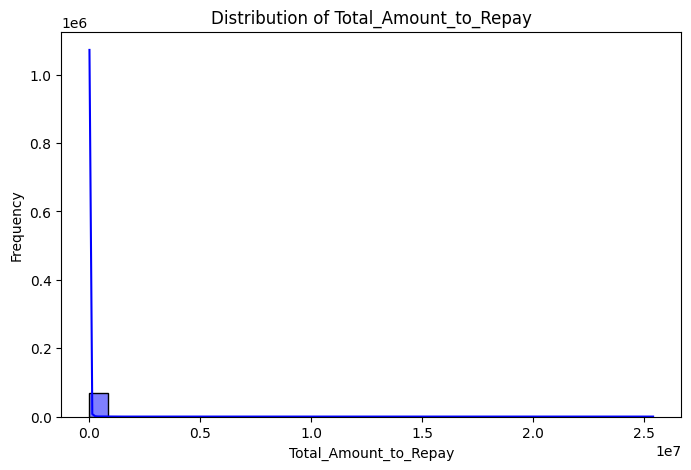

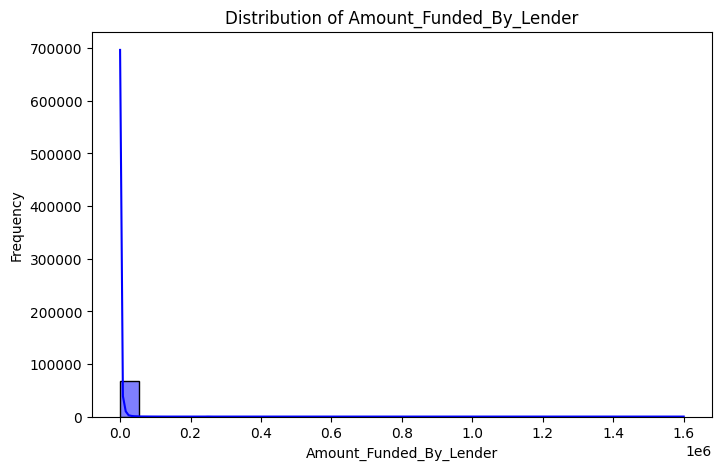

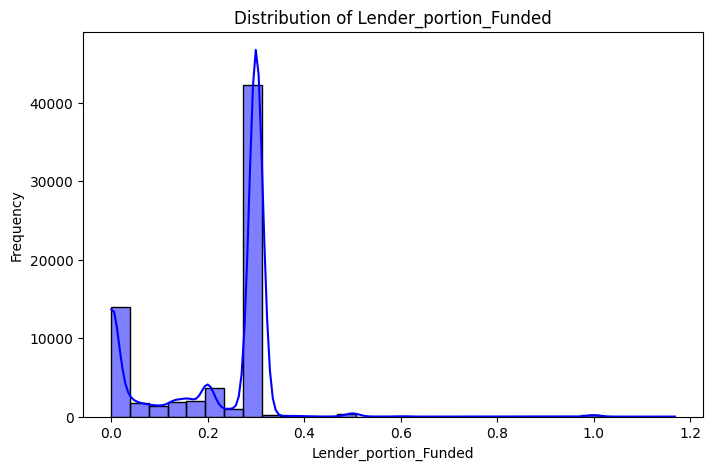

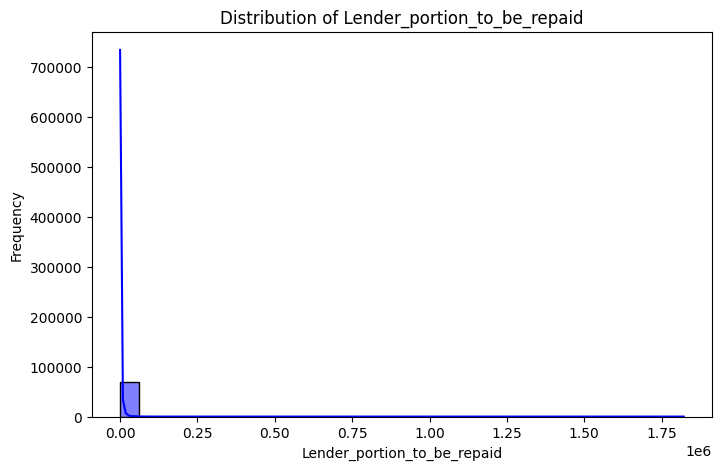

In [13]:
# List of amount columns
amount_columns = ['Total_Amount', 'Total_Amount_to_Repay', 'Amount_Funded_By_Lender',
                  'Lender_portion_Funded', 'Lender_portion_to_be_repaid']

# Create histograms
for column in amount_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=train_df, x=column, kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
train_df['target'].value_counts()

,count
target,
0,67396
1,1258


In [15]:
test_df=pd.read_csv('/content/drive/MyDrive/african-credit-scoring-challenge20241203-14702-1yayxml (1)/Test.csv')

In [16]:
test_df

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.00,1989.00,2022-07-27,2022-08-03,7,Repeat Loan,575.70,0.300000,597.00
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.00,2153.00,2022-11-16,2022-11-23,7,Repeat Loan,0.00,0.000000,0.00
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.00,8304.00,2022-08-24,2022-08-31,7,Repeat Loan,207.00,0.025079,208.00
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.00,3379.00,2022-11-15,2022-11-22,7,Repeat Loan,1013.70,0.300000,1014.00
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.00,120.00,2022-11-10,2022-11-17,7,Repeat Loan,36.00,0.300000,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,ID_297596365331297183,297596,Ghana,365331,297183,Type_3,1730.41,1782.32,2023-02-09,2023-02-16,7,Repeat Loan,269.41,0.155689,279.77
18590,ID_259715231897267278,259715,Kenya,231897,267278,Type_1,1534.00,1534.00,2022-08-04,2022-08-11,7,Repeat Loan,460.20,0.300000,460.00
18591,ID_296701364008297183,296701,Ghana,364008,297183,Type_3,1372.21,1413.30,2022-06-23,2022-06-30,7,Repeat Loan,178.67,0.130208,178.67
18592,ID_268271242864267278,268271,Kenya,242864,267278,Type_1,5608.00,5781.00,2022-08-23,2022-08-30,7,Repeat Loan,0.00,0.000000,0.00


In [17]:
# List of columns to convert to 'category'
categorical_columns = ['country_id', 'loan_type', 'New_versus_Repeat','lender_id']

# Convert specified columns to 'category'
for col in categorical_columns:
    train_df[col] = train_df[col].astype('category')
    test_df[col]=test_df[col].astype('category')

In [18]:
# Convert date columns to datetime if needed
train_df['disbursement_date'] = pd.to_datetime(train_df['disbursement_date'])
train_df['due_date'] = pd.to_datetime(train_df['due_date'])

test_df['disbursement_date'] = pd.to_datetime(test_df['disbursement_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])

In [19]:
# Extract year and month separately as datetime objects for train dataset
train_df['disbursement_year'] = pd.to_datetime(train_df['disbursement_date'].dt.year)
train_df['disbursement_month'] = pd.to_datetime(train_df['disbursement_date'].dt.month)

train_df['due_year'] = pd.to_datetime(train_df['due_date'].dt.year)
train_df['due_month'] = pd.to_datetime(train_df['due_date'].dt.month)

In [20]:
# Extract year and month separately as datetime objects for test dataset
test_df['disbursement_year'] = pd.to_datetime(test_df['disbursement_date'].dt.year)
test_df['disbursement_month'] = pd.to_datetime(test_df['disbursement_date'].dt.month)

test_df['due_year'] = pd.to_datetime(test_df['due_date'].dt.year)
test_df['due_month'] = pd.to_datetime(test_df['due_date'].dt.month)

In [21]:
#drop date columns
train_df.drop(columns=['disbursement_date','due_date'],inplace=True)
test_df.drop(columns=['disbursement_date','due_date'],inplace=True)

In [22]:
#feature engeneering columns
train_df['Repayment_Ratio'] = train_df['Total_Amount_to_Repay'] / train_df['Total_Amount']
train_df['Loan-to-Repayment Gap']= train_df['Total_Amount_to_Repay'] - train_df['Amount_Funded_By_Lender']

test_df['Repayment_Ratio'] = test_df['Total_Amount_to_Repay'] / test_df['Total_Amount']
test_df['Loan-to-Repayment Gap']= test_df['Total_Amount_to_Repay'] - test_df['Amount_Funded_By_Lender']

In [23]:
# deal with numerical columns: we saw loan amount is  highly right skewed for this we can log transform it
train_df['Total_Amount'] = np.log1p(train_df['Total_Amount'])
test_df['Total_Amount'] = np.log1p(test_df['Total_Amount'])

In [24]:

# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['datetime64[ns]','category']).columns
categorical_cols = test_df.select_dtypes(include=['datetime64[ns]','category']).columns

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.fit_transform(test_df[col])

In [26]:
# Drop unnecessary columns
X_train = train_df.drop(['ID', 'target','country_id'], axis=1)
y_train = train_df['target']

X_test = test_df.drop(['ID','country_id'], axis=1)

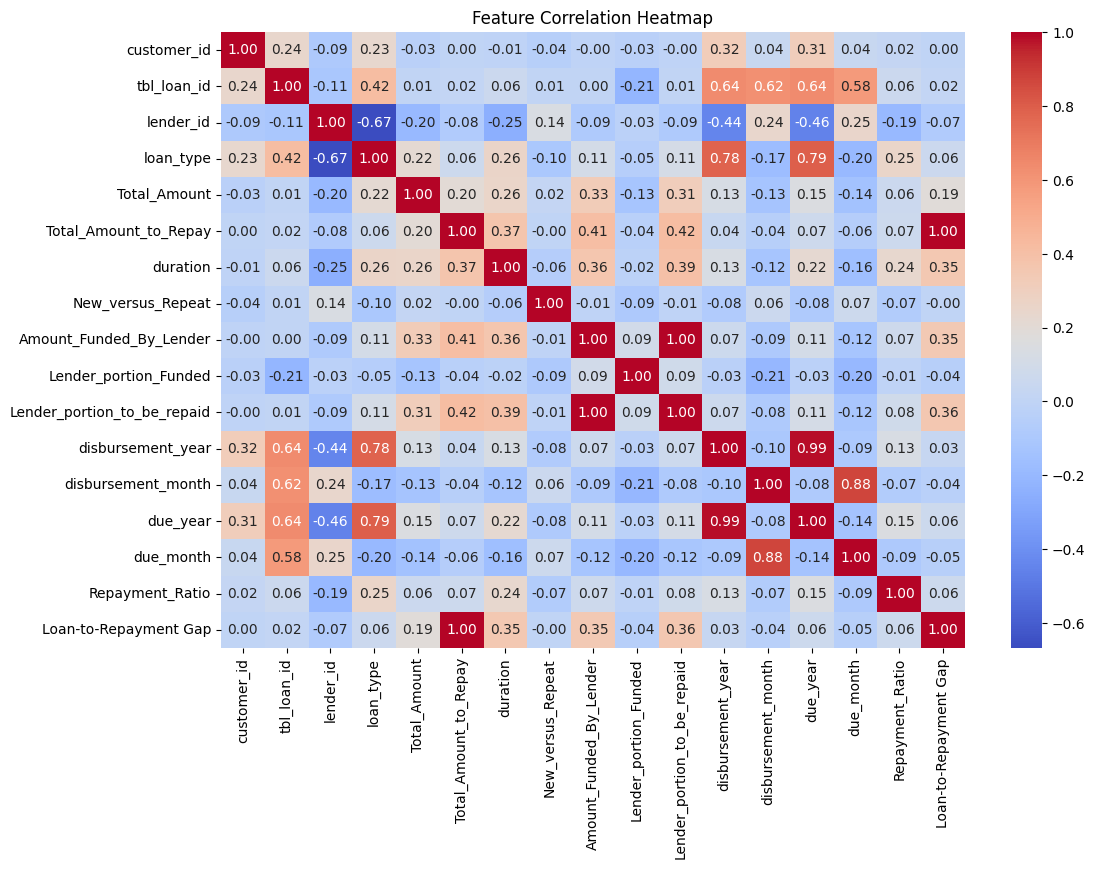

In [27]:
# Calculate the correlation matrix for numeric features
correlation_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
#Identify numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

In [29]:
# Scale numeric features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [30]:
# Define the parameter grid for Grid Search
param_grid = { 'n_estimators': [2000],
              'learning_rate': [0.1, 0.2],
               'max_depth': [3,5],
               'subsample': [1.0],
               'colsample_bytree': [0.8] }

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42,use_label_encoder=False, eval_metric='logloss')

In [31]:
# Initialize Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit Grid Search
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.1, 0.2],
                         'max_depth': [3, 5], 'n_estimators': [2000],
                         'subsample': [1.0]},
             scoring='accuracy')

In [32]:
# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 2000, 'subsample': 1.0}


In [33]:
# Use the best model
best_model = grid_search.best_estimator_

In [34]:
# Cross-validation using KFold
kf = KFold(n_splits=5)

# Reset index to ensure integer-based indexing
X_train_scaled.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

for train_idx, val_idx in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled.loc[train_idx], X_train_scaled.loc[val_idx]
    y_train_fold, y_val_fold = y_train.loc[train_idx], y_train.loc[val_idx]

    # Train model on the fold
    xgb_model.fit(X_train_fold, y_train_fold)

    # Predict on validation fold
    y_val_pred = xgb_model.predict(X_val_fold)

    # Evaluate the model
    print("Fold Accuracy:", accuracy_score(y_val_fold, y_val_pred))
    print("Classification Report:\n", classification_report(y_val_fold, y_val_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val_fold, y_val_pred))

Fold Accuracy: 0.9949020464642051
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13452
           1       0.89      0.85      0.87       279

    accuracy                           0.99     13731
   macro avg       0.95      0.92      0.93     13731
weighted avg       0.99      0.99      0.99     13731

Confusion Matrix:
 [[13424    28]
 [   42   237]]
Fold Accuracy: 0.9952661860024762
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       0.90      0.85      0.87       262

    accuracy                           1.00     13731
   macro avg       0.95      0.92      0.93     13731
weighted avg       1.00      1.00      1.00     13731

Confusion Matrix:
 [[13444    25]
 [   40   222]]
Fold Accuracy: 0.9953390139101304
Classification Report:
               precision    recall  f1-score   support

           0     

In [35]:
#xgb_model.fit(X_train_scaled, y)

In [36]:
# Calculate confusion matrix
print(classification_report(y_val_fold, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13485
           1       0.93      0.85      0.89       245

    accuracy                           1.00     13730
   macro avg       0.96      0.92      0.94     13730
weighted avg       1.00      1.00      1.00     13730



Confusion Matrix:
[[13470    15]
 [   37   208]]


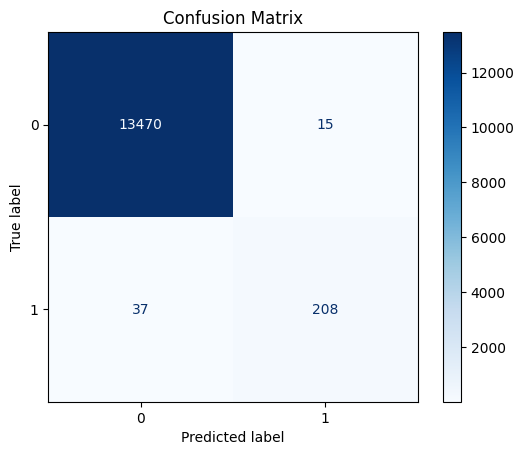

In [37]:
# Calculate confusion matrix
cm = confusion_matrix(y_val_fold, y_val_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [38]:
# Scale testing data
X_test_scaled = scaler.transform(X_test)

In [39]:
# Predict on the test set
test_predictions = xgb_model.predict(X_test_scaled)

In [40]:
# Save predictions
submission = pd.DataFrame({'ID': test_df['ID'], 'target': test_predictions})
submission.to_csv('acs.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!


In [41]:
# Evaluate F1 Score
f1 = f1_score(y_val_fold, y_val_pred, average='weighted')  # Use 'weighted' if the classes are imbalanced
print("Validation F1 Score:", f1)

Validation F1 Score: 0.9961251980511227


In [42]:
# Feature Importance
importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                        Feature  Importance
15              Repayment_Ratio    0.341008
7             New_versus_Repeat    0.294104
3                     loan_type    0.083502
6                      duration    0.063106
8       Amount_Funded_By_Lender    0.053241
1                   tbl_loan_id    0.027800
10  Lender_portion_to_be_repaid    0.018872
4                  Total_Amount    0.016589
14                    due_month    0.016292
16        Loan-to-Repayment Gap    0.015624
9         Lender_portion_Funded    0.013879
12           disbursement_month    0.013423
5         Total_Amount_to_Repay    0.011483
0                   customer_id    0.010273
2                     lender_id    0.009151
11            disbursement_year    0.005869
13                     due_year    0.005784
